In [1]:
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

data = {
    'TransactionID': [1, 2, 3, 4, 5],
    'A': [0, 0, 1, 0, 1],
    'B': [0, 0, 0, 1, 0],
    'C': [0, 1, 0, 0, 1],
    'D': [1, 1, 1, 1, 0],
    'E': [0, 1, 1, 1, 0],
    'F': [1, 0, 0, 0, 0],
    'G': [1, 1, 0, 0, 0],
    'H': [1, 0, 0, 1, 1],
    'I': [0, 0, 0, 0, 1],
    'J': [1, 0, 0, 0, 0]
}

df = pd.DataFrame(data)
df.head()


,TransactionID,A,B,C,D,E,F,G,H,I,J
0,1,0,0,0,1,0,1,1,1,0,1
1,2,0,0,1,1,1,0,1,0,0,0
2,3,1,0,0,1,1,0,0,0,0,0
3,4,0,1,0,1,1,0,0,1,0,0
4,5,1,0,1,0,0,0,0,1,1,0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


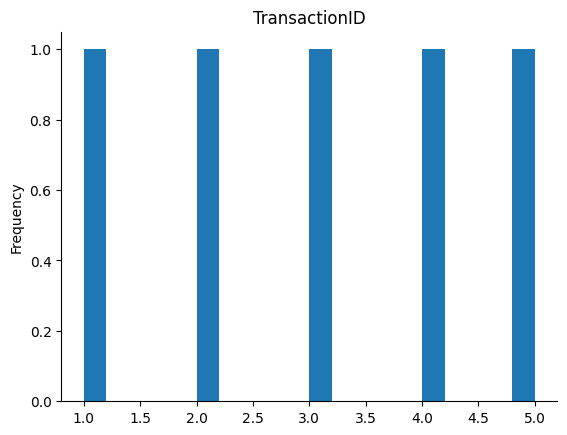

In [5]:
from matplotlib import pyplot as plt
df['TransactionID'].plot(kind='hist', bins=20, title='TransactionID')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [7]:
frequent_items = apriori(df.drop('TransactionID', axis=1), min_support=0.4, use_colnames=True)
frequent_items

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.4,(A)
1,0.4,(C)
2,0.8,(D)
3,0.6,(E)
4,0.4,(G)
5,0.6,(H)
6,0.6,"(D, E)"
7,0.4,"(D, G)"
8,0.4,"(D, H)"


In [8]:
rule1 = association_rules(frequent_items, metric="lift", min_threshold=1)
rule1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(D),(E),0.8,0.6,0.6,0.75,1.25,0.12,1.6,1.000000
1,(E),(D),0.6,0.8,0.6,1.00,1.25,0.12,inf,0.500000
2,(D),(G),0.8,0.4,0.4,0.50,1.25,0.08,1.2,1.000000
3,(G),(D),0.4,0.8,0.4,1.00,1.25,0.08,inf,0.333333
